In [1]:
# Step 1 — import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Step 2 — generate synthetic dataset
np.random.seed(42)

n = 600   # total orders

data = {
    "OrderID": np.arange(1, n + 1),
    "Meal": np.random.choice([
        "Pad Thai", "Green Curry", "Tom Yum Soup", 
        "Massaman Curry", "Thai Fried Rice"
    ], n),
    "SalePrice": np.round(np.random.uniform(8.0, 22.0, n), 2),   # price customer paid
    "CostPrice": np.round(np.random.uniform(5.0, 15.0, n), 2),   # restaurant cost
    "CustomerAge": np.random.randint(18, 75, n),                 # age
    "Gender": np.random.choice(["Male","Female","Non-Binary"], n),
    "City": np.random.choice(["Bangkok","London","NYC","Sydney","Tokyo"], n)
}

df = pd.DataFrame(data)

# compute additional metrics
df["Profit"] = df["SalePrice"] - df["CostPrice"]
df["ProfitMarginPct"] = np.round((df["Profit"] / df["SalePrice"]) * 100, 2)

df.head()

,OrderID,Meal,SalePrice,CostPrice,CustomerAge,Gender,City,Profit,ProfitMarginPct
0,1,Massaman Curry,21.90,9.28,69,Female,Tokyo,12.62,57.63
1,2,Thai Fried Rice,9.03,8.84,31,Non-Binary,London,0.19,2.10
2,3,Tom Yum Soup,15.75,11.80,26,Non-Binary,Tokyo,3.95,25.08
3,4,Thai Fried Rice,21.57,7.18,32,Female,London,14.39,66.71
4,5,Thai Fried Rice,15.32,14.50,38,Non-Binary,Tokyo,0.82,5.35


In [3]:
# Step 3 — inspect data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          600 non-null    int64  
 1   Meal             600 non-null    object 
 2   SalePrice        600 non-null    float64
 3   CostPrice        600 non-null    float64
 4   CustomerAge      600 non-null    int64  
 5   Gender           600 non-null    object 
 6   City             600 non-null    object 
 7   Profit           600 non-null    float64
 8   ProfitMarginPct  600 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 42.3+ KB


,OrderID,SalePrice,CostPrice,CustomerAge,Profit,ProfitMarginPct
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,14.896233,10.111950,45.908333,4.784283,25.935883
std,173.349358,4.068558,2.910234,16.175785,5.132862,32.298563
min,1.000000,8.060000,5.050000,18.000000,-6.520000,-79.710000
25%,150.750000,11.327500,7.427500,32.750000,0.665000,5.342500
50%,300.500000,14.870000,10.285000,46.000000,4.880000,32.930000
75%,450.250000,18.390000,12.587500,60.000000,8.580000,50.230000
max,600.000000,22.000000,14.990000,74.000000,16.140000,75.510000


In [4]:
# Step 4 — summarize by meal
meal_summary = df.groupby("Meal").agg({
    "SalePrice": "sum",
    "Profit": "sum",
    "ProfitMarginPct": "mean"
}).reset_index()

meal_summary

,Meal,SalePrice,Profit,ProfitMarginPct
0,Green Curry,1704.97,588.99,28.403604
1,Massaman Curry,2023.79,694.52,28.488955
2,Pad Thai,1961.20,656.04,28.599606
3,Thai Fried Rice,1697.45,444.51,18.476033
4,Tom Yum Soup,1550.33,486.51,25.452897


Text(0, 0.5, 'Count')

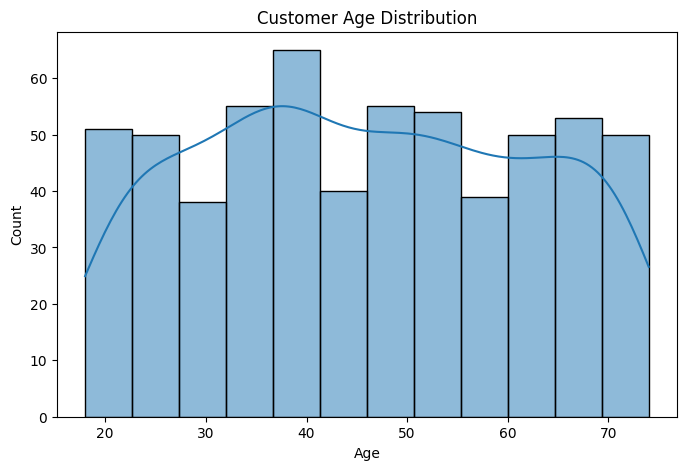

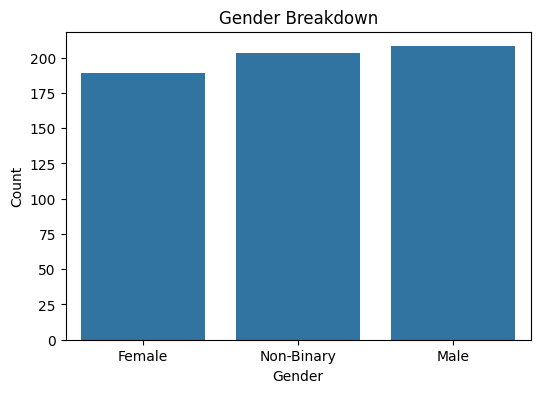

In [5]:
# Step 5 — customer age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["CustomerAge"], bins=12, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

# gender counts
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.title("Gender Breakdown")
plt.ylabel("Count")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Massaman Curry'),
  Text(1, 0, 'Thai Fried Rice'),
  Text(2, 0, 'Tom Yum Soup'),
  Text(3, 0, 'Green Curry'),
  Text(4, 0, 'Pad Thai')])

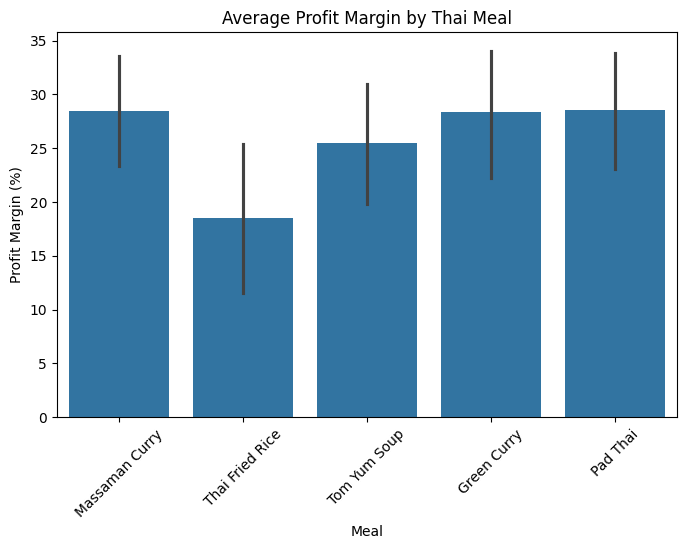

In [6]:
# Step 6 — profit margin bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Meal", y="ProfitMarginPct", data=df)
plt.title("Average Profit Margin by Thai Meal")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Meal")
plt.xticks(rotation=45)

In [7]:
# Step 7 — export to CSV
df.to_csv("thai_meals_sales.csv", index=False)
print("Dataset saved!")

Dataset saved!
